[ 1 az 2 strany ]
1. opis problemu + motivacia
2. opis dat + charakteristiky (zdroj, struktura, format, mnozstva)
    - opisna statistika (median, priemer, outlier, chybajuce hodnoty...)
    - korelacia a zavislosti medzi atributmi
3. definovanie ulohy, predpokladany scenar riesenia
    - klasifikacia - class atribut
    - regresia - atribut, distribucia
    
zdroj dat: https://www.kaggle.com/avikasliwal/used-cars-price-prediction
    

In [34]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Nacitanie dat

In [2]:
df = pd.read_csv('data/cars_raw.csv').drop('Unnamed: 0', axis=1)

In [3]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


## Analyza datasetu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [5]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

## Analyza stlpcov datasetu
- vypis najcastejsich hodnot v jednotlivych stlpcoch + pocet unikatnych hodnot v datasete

In [7]:
for col in df:
    print(f"{col} [{len(df[col].value_counts())}]")
    print(df[col].value_counts()[:5])
    print()

Name [1876]
Mahindra XUV500 W8 2WD    49
Maruti Swift VDI          45
Maruti Swift Dzire VDI    34
Honda City 1.5 S MT       34
Maruti Swift VDI BSIV     31
Name: Name, dtype: int64

Location [11]
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Name: Location, dtype: int64

Year [22]
2014    797
2015    744
2016    741
2013    649
2017    587
Name: Year, dtype: int64

Kilometers_Driven [3093]
60000    82
45000    70
65000    68
50000    61
70000    60
Name: Kilometers_Driven, dtype: int64

Fuel_Type [5]
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

Transmission [2]
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

Owner_Type [4]
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

Mileage [442]
17.0 kmpl     172
18.9 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
Nam

In [8]:
print("location")
print(df["Location"].value_counts())
print()
print("Year")
print(df["Year"].value_counts())
print()
print("Fuel_Type")
print(df["Fuel_Type"].value_counts())
print()
print("Seats")
print(df["Seats"].value_counts())

location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

Year
2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
1998      4
2000      4
1999      2
Name: Year, dtype: int64

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

Seats
5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64


In [9]:
df.loc[df['Seats'] == 0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.0


In [10]:
df.plot(kind="box",y="Year",showfliers=True)

(-10, 1000000)

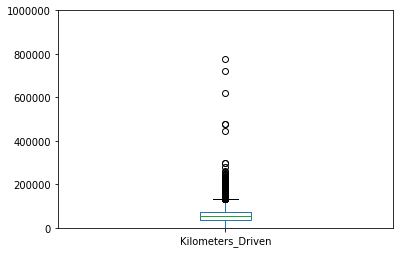

In [11]:
df.plot(kind="box",y="Kilometers_Driven",showfliers=True).set_ylim(-10,1000000)

In [12]:

df.loc[df['Kilometers_Driven'] >= 133000].sort_values(by=['Kilometers_Driven'], ascending=False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.45
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.0 kmpl,1405 CC,70 bhp,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0,NaN,4.00
1975,Skoda Superb 1.8 TSI MT,Pune,2012,282000,Petrol,Manual,First,13.14 kmpl,1798 CC,160 bhp,5.0,NaN,3.30


Co spravime s mileage? su tam rozne jednotky kvoli CNG A LPG, odveci by nebolo to zmenit na chapane jednotky l/100km

In [16]:
delete_strings(["Power", "Engine"])

['Power', 'Engine']
Power


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Engine


In [15]:
def delete_strings(columns):
    print(columns)
    for column in columns:
        df[column] = [str(value).split()[0] for value in df[column]]
        for i in range(len(df[column])):
            if df[column][i] == "nan" or df[column][i] == "null":
                df[column][i] = np.NaN
            else:
                try:
                    df[column][i] = int(df[column][i])
                except:
                    df[column][i] = float(df[column][i])

In [ ]:
df['Engine'] = pd.to_numeric(df["Engine"])
df['Power'] = pd.to_numeric(df["Power"])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5876 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [43]:
df.describe()

,Year,Kilometers_Driven,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,5998.000000,560.000000,10.000000,160.000000


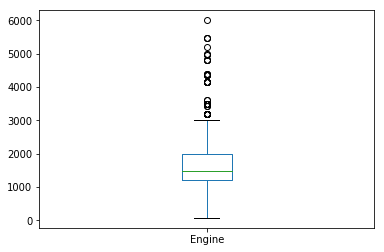

In [27]:
df.plot(kind="box",y="Engine",showfliers=True)

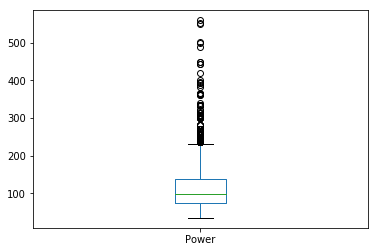

In [26]:
df.plot(kind="box",y="Power",showfliers=True)

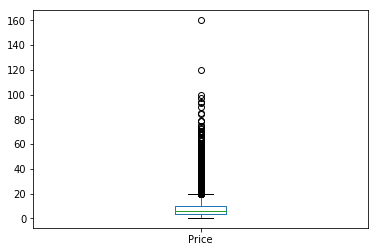

In [28]:
df.plot(kind="box",y="Price",showfliers=True)

In [30]:
df.loc[df['Price'] > 110]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993,255,5.0,2.3 Cr,160.0
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204,560,2.0,NaN,120.0


# Parova analyza

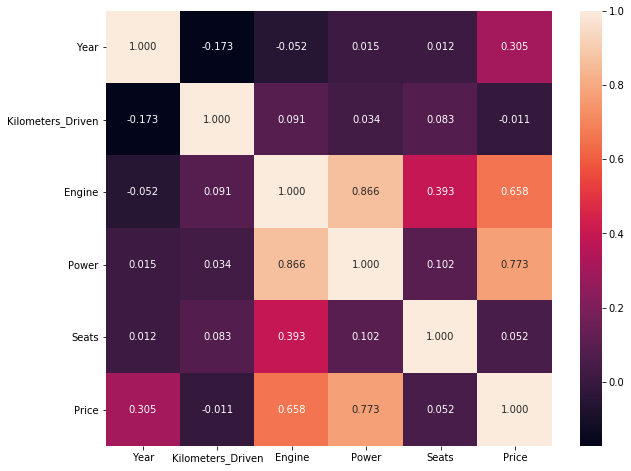

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".3f")